<a href="https://colab.research.google.com/github/annefrancine/ML_2022-2023/blob/main/Regression_logistique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La régression logistique est un modèle statistique permettant d’étudier les relations entre un ensemble de variables qualitatives Xi et une variable qualitative Y. Il s’agit d’un modèle linéaire généralisé utilisant une fonction logistique comme fonction de lien.

Un modèle de régression logistique permet aussi de prédire la probabilité qu’un événement arrive (valeur de 1) ou non (valeur de 0) à partir de l’optimisation des coefficients de régression. Ce résultat varie toujours entre 0 et 1. Lorsque la valeur prédite est supérieure à un seuil, l’événement est susceptible de se produire, alors que lorsque cette valeur est inférieure au même seuil, il ne l’est pas.

Il existe plusieurs types de régression logistique, à savoir :

* Régression logistique binaire : la variable cible n’a que deux résultats possibles, comme par exemple « cancer » ou « pas de cancer ».
* Régression logistique multinomiale : la variable cible a trois catégories nominales ou plus, comme par exemple la prédiction du type d’un iris.
* Régression logistique ordinale : la variable cible a trois catégories ordinales ou plus, comme la notation des produits de 1 à 5.

## Mathématiquement, comment ça se traduit/ça s’écrit ?

Considérons une entrée  X= x1 x2 x3 …  xn , la régression logistique a pour objectif de trouver une fonction h telle que nous puissions calculer :

y= {1   si   hX≥ seuil ,  0   si   hX< seuil}  

**On comprend donc qu’on attend de notre fonction h qu’elle soit une probabilité comprise entre 0 et 1, paramétrée par =1 2 3 n à optimiser, et que le seuil que nous définissons correspond à notre critère de classification, généralement il est pris comme valant 0.5.**

La fonction qui remplit le mieux ces conditions est la fonction sigmoïde, définie sur R à valeurs dans [0,1]. Elle s’écrit de la manière suivante :

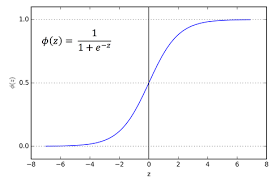



Graphiquement, celle-ci correspond à une courbe en forme de S qui a pour limites 0 et 1 lorsque x tend respectivement vers -∞ et +∞ passant par y = 0.5 en x = 0.

In [ ]:
# charger les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

In [ ]:
# lire le dataset
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sns.countplot(x)
        plt.show()
    return res

In [ ]:
# Combien ont survécu et n'ont pas survécu ?

(titanic.Survived.value_counts() / titanic.shape[0]) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

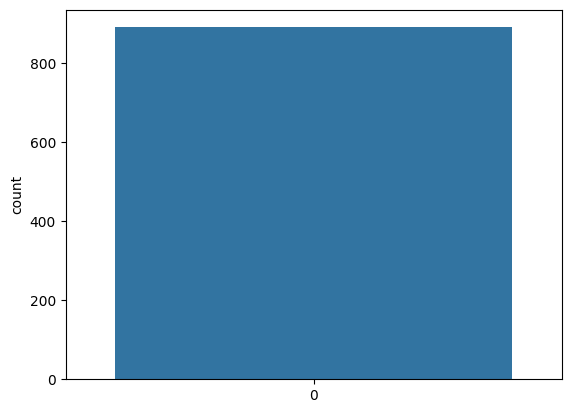

,values,n,perc
0,0,549,61.616
1,1,342,38.384


In [ ]:
freq(titanic.Survived, plot=True)

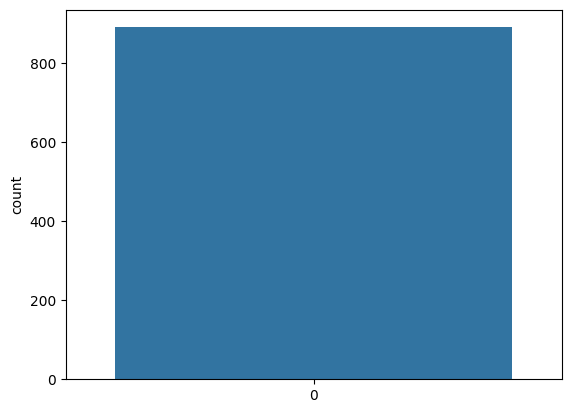

,values,n,perc
3,3,491,55.107
1,1,216,24.242
2,2,184,20.651


In [ ]:
freq(titanic.Pclass, plot=True)

In [ ]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

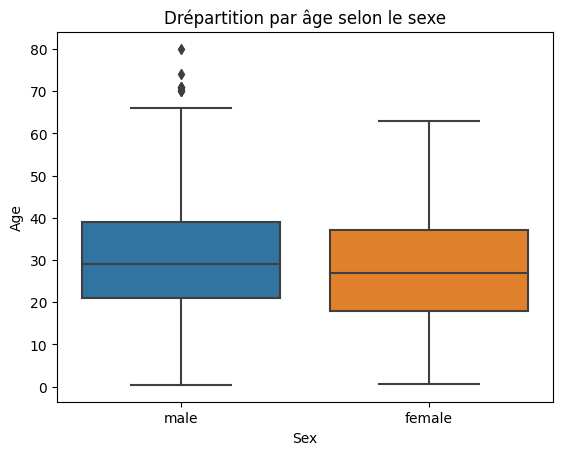

In [ ]:
sns.boxplot(x='Sex', y='Age', data=titanic)
plt.title('Drépartition par âge selon le sexe')
plt.show()

## Modélisation
Estimons maintenant une régression logistique pour étudier les chances de survie des personnes en fonction de 3 prédicteurs :


* l'âge
* la classe dans laquelle la personne voyageait et
* le sexe

In [ ]:
#transforme la classe en catégorielle

titanic['Pclass'] = titanic['Pclass'].astype('category')

In [ ]:
#package stats model : https://www.statsmodels.org/dev/examples/notebooks/generated/glm_formula.html
# https://www.statsmodels.org/stable/index.html

modelo = smf.glm(formula='Survived ~ Age + Pclass + Sex', data=titanic,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Thu, 17 Aug 2023   Deviance:                       647.28
Time:                        14:13:27   Pearson chi2:                     767.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.7770      0.401      9.416      

Maintenant, interprétons les résultats du modèle. Les logits estimés ne peuvent être interprétés qu'en termes d'augmentation ou de diminution des chances de survie car ils sont en échelle logarithmique. Tous les coefficients estimés étaient statistiquement significatifs (valeur de p inférieure à 0,05 avec un niveau de confiance de 95 %).

Les personnes voyageant en deuxième classe ont moins de chances de survie que celles voyageant en première classe. Ceux qui voyagent en troisième classe ont encore moins de chances. Les hommes ont moins de chances de survivre que les femmes. Plus vous êtes âgé, plus vos chances de survie sont faibles. Ce sont les intuitions générales du modèle.

Pour obtenir des coefficients plus interprétables, nous devons effectuer une transformation. En utilisant $e^\beta$, nous obtenons les probabilités relatives

In [ ]:
print(np.exp(modelo.params[1:]))

Pclass[T.2]    0.269874
Pclass[T.3]    0.075727
Sex[T.male]    0.080236
Age            0.963690
dtype: float64


Les personnes voyageant en deuxième classe avaient 0,27 des chances de survie des personnes en première classe. Les personnes de troisième classe avaient 0,076 de chances que les personnes de première classe avaient. Les hommes avaient 0,08 autant de chances que les femmes.

Pour chaque année de survie supplémentaire, l'individu a 0,96 des chances d'un autre individu avec un an de moins.

Nous pouvons également générer les mêmes données en pourcentages relatifs de chances pour les comparer et obtenir une interprétation similaire à l'interprétation de la régression linéaire, mais en termes de chances.

In [ ]:
(np.exp(modelo.params[1:]) - 1) * 100

Pclass[T.2]   -73.012578
Pclass[T.3]   -92.427336
Sex[T.male]   -91.976383
Age            -3.630967
dtype: float64

Maintenant, c'est facile. Les personnes de seconde classe ont 73 % de chances de survie en moins que les personnes de première classe. Les personnes de troisième classe ont 92 % moins de chances de survivre que les personnes de première classe. Les hommes ont 92 % moins de chances de survivre que les femmes.

Nous allons maintenant refaire le modèle à l'aide de scikit-learn pour faciliter l'obtention des métriques d'ajustement.

In [ ]:
model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = titanic[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
y = baseline_df.Survived#variable target
X = pd.get_dummies(baseline_df[['Pclass', 'Sex', 'Age']], drop_first=True)
print(X)

      Age  Pclass_2  Pclass_3  Sex_male
0    22.0         0         1         1
1    38.0         0         0         0
2    26.0         0         1         0
3    35.0         0         0         0
4    35.0         0         1         1
..    ...       ...       ...       ...
885  39.0         0         1         0
886  27.0         1         0         1
887  19.0         0         0         0
889  26.0         0         0         1
890  32.0         0         1         1

[714 rows x 4 columns]


In [ ]:
model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(multi_class='warn', penalty='none', solver='newton-cg')

In [ ]:
print(model.coef_)

[[-0.03698527 -1.30979927 -2.5806253  -2.52278091]]


In [ ]:
#Prediction
yhat = model.predict_proba(X)

In [ ]:
yhat = yhat[:, 1]#garder uniquement pour la classe positive

#Metriques

In [ ]:
confusion_matrix(y, model.predict(X)) #matrice de confusion

array([[356,  68],
       [ 83, 207]])

In [ ]:
pd.crosstab(y, model.predict(X))# faire la matrice de confusion avec pandas

col_0,0,1
Survived,,
0,356,68
1,83,207


In [ ]:
#Accuracy
ac = accuracy_score(y, model.predict(X))
ac

0.788515406162465

L'accuracy n'est pas une très bonne mesure pour travailler avec des modèles de classement car elle peut nous faire croire qu'un modèle qui prédit correctement tous les zéros mais aucun n'est un très bon modèle. Regardons d'autres métriques alternatives plus intéressantes que l'accuracy.

In [ ]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       424
           1       0.75      0.71      0.73       290

    accuracy                           0.79       714
   macro avg       0.78      0.78      0.78       714
weighted avg       0.79      0.79      0.79       714



Le rapport de classification SciKit-Learn nous fournit les trois mesures d'évaluation présentées dans la figure ci-dessus

* Precision : C'est  la capacité du modèle à ne pas prédire une instance négative comme positive (ne pas commettre d'erreur de type 1). Pour toutes les instances classées

* Recall : C'est la capacité du modèle à trouver toutes les instances positives. Pour toutes les instances qui sont réellement positives, quel est le pourcentage de réussite

* F1 score : combine les deux ci-dessus en tant que moyenne harmonique entre eux. Il doit toujours être prioritaire de comparer les modèles de classement pour l'exactitude.

Une excellente alternative est de faire la courbe ROC et de calculer l'AUC (aire sous la courbe).

La courbe ROC (Receiver Operating Characteristic Curve) prend en compte le TPR (True Positive Rate or Recall or Sensitity) et le FPR (False Positive Rate or Specificity).

La courbe ROC trace ces deux paramètres. l'AUC (Area Under the Curve) est une valeur qui synthétise les informations de la courbe ROC. Il va de 0,5 à 1. En bref, cette métrique nous indique dans quelle mesure le modèle est capable de distinguer les deux classes. Regardons la courbe AUC et RUC pour le modèle que nous avons estimé.

Voici comment interpréter et analyser une courbe ROC :

Axe des abscisses (X) : Il représente le taux de faux positifs (FPR), c'est-à-dire le pourcentage d'échantillons négatifs incorrectement classés comme positifs par le modèle. Cela se calcule comme FPR = FP / (FP + TN), où FP représente le nombre de faux positifs et TN le nombre de vrais négatifs.

Axe des ordonnées (Y) : Il représente le taux de vrais positifs (TPR), également appelé sensibilité ou rappel. C'est le pourcentage d'échantillons positifs correctement classés comme positifs par le modèle. Cela se calcule comme TPR = TP / (TP + FN), où TP représente le nombre de vrais positifs et FN le nombre de faux négatifs.

La courbe ROC est générée en calculant ces taux pour différents seuils de probabilité de classification du modèle et en traçant les points correspondants. Chaque point sur la courbe ROC représente un équilibre entre le taux de vrais positifs et le taux de faux positifs pour un certain seuil.

Plus le modèle est performant, plus la courbe ROC sera proche du coin supérieur gauche du graphique. Une courbe idéale passerait par le coin supérieur gauche (100% de sensibilité et 0% de FPR), indiquant que le modèle peut distinguer parfaitement entre les classes positives et négatives.

L'aire sous la courbe ROC (AUC-ROC) est également une mesure importante. Elle représente la surface sous la courbe ROC et mesure la capacité globale du modèle à classer correctement les échantillons. Plus l'AUC-ROC est élevée, meilleure est la performance du modèle. Une AUC-ROC de 0,5 indique une performance aléatoire, tandis qu'une AUC-ROC de 1 indique une performance parfaite.

En résumé, la courbe ROC et l'AUC-ROC sont des outils importants pour évaluer la performance d'un modèle de classification binaire. Ils vous permettent de choisir le meilleur compromis entre sensibilité et spécificité en ajustant le seuil de classification, et de comparer différents modèles en fonction de leurs performances globales.

In [ ]:
print('AUC: %0.2f' % roc_auc_score(y, yhat))

AUC: 0.85


In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

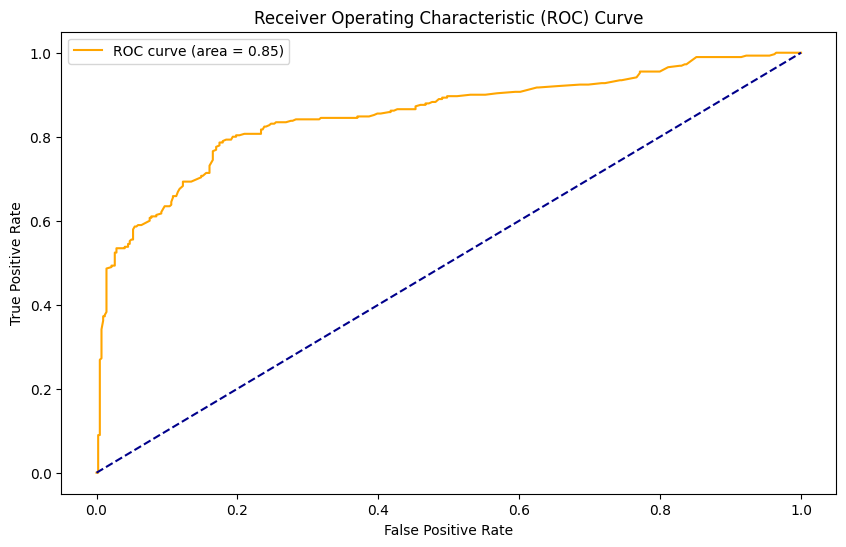

In [ ]:
plot_roc_curve(y, yhat)

Nous pouvons considérer qu'une aire sous la courbe supérieure à 0,7 est acceptable. Plus de 0,8 semble bon. Plus de 0,9 c'est bien. Il existe également d'autres mesures que nous pouvons explorer.

## Prediction


In [ ]:
moi = pd.DataFrame({'Age':32, 'Pclass_2':0, 'Pclass_3':1, 'Sex_male':1}, index=[0])
prob = model.predict_proba(moi)
print('Jaurais {} % de probabilité de survie si jétais sur le Titanic'\
      .format(round(prob[:,1][0]*100, 2)))

Jaurais 7.52 % de probabilité de survie si jétais sur le Titanic
